# Polya Urn Model

The beta distribution specified by $\boldsymbol{\alpha} = (\alpha, \beta)$ can be illustrated by the Polya urn model. Imagine an urn which contains balls of two different colours. Initially the urn contains $\alpha_1 = \alpha$ balls of colour 1, $\alpha_2 = \beta$ balls of colour 2.

Now, each time a ball is drawn from the urn and replaced, but also another ball of the same colour is added, until the urn contains $N$ balls. Since the colour drawn is random, the final number of balls of each colour is a random variable. However, it is influenced by the initial proportion of balls. If initially there are only balls of one colour, then the outcome is determined, because then the urn will continue to contain only balls of one colour. If there are disproportionally more balls of one colour, we would expect there also being more balls of that colour in the final set, since it is more likely that this colour is drawn and then it becomes even more likely, since a ball of that colour is added. This is known as rich-get-richer. However, this is the expectation. Other proportions are also possible, just less likely.

Change the value of $\boldsymbol{\alpha} = (\alpha, \beta)$ and see how the histogram changes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

def polya(alpha, N):
    # Initialise the urn with alpha which specifies the
    # number of balls of two different colours.
    y = copy(alpha)
    for n in range(1 , (N - sum(alpha))):
	# Calculate the proportions of each colour.
        p = np.divide(y, float(sum(y)))
	# Choose a random index according to the proportions.
        idx = np.random.choice(len(p), None, True, p)
	# Add a ball of the colour indicated by the index.
        y[idx] = y[idx] + 1
    return y

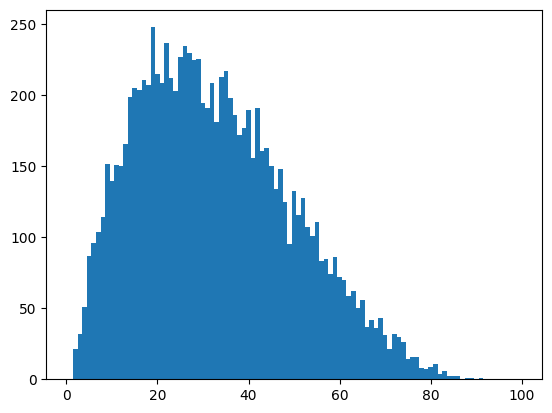

In [5]:
# Final number of balls:
N = 100
# Number of experiments:
I = 10000

# Initialising alpha.
alpha = [2, 4]
# First experiment:
Y= polya(alpha,N)

# Further experiments:
for i in range(1,I):
    y = polya(alpha,N)
    Y = np.vstack((Y,y))

# Plot histogram of experiment outcomes.
plt.hist(Y[:,0], bins = range(1,101) -0.5 * np.ones(100))
plt.show()